# Data Augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.



In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib

data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [8]:
len(list(data_dir.glob('*/*.jpg')))


3670

In [9]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

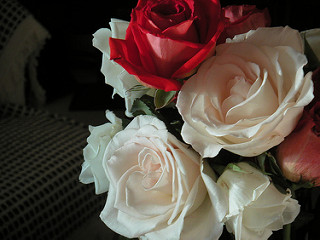

In [10]:
PIL.Image.open(str(roses[1]))

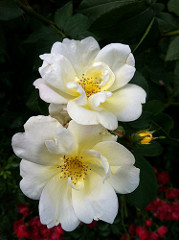

In [11]:
PIL.Image.open(str(roses[0]))

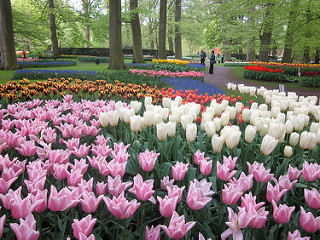

In [52]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[30]))

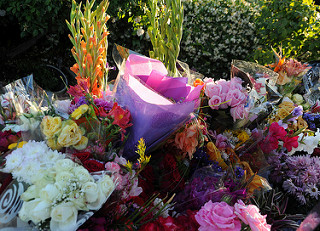

In [13]:
PIL.Image.open(str(roses[3]))

In [14]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [15]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [16]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [18]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [19]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [20]:
img.shape

(240, 179, 3)

In [21]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
    #print(flower_name)
    #print(len(flower_name))

In [23]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [24]:
X=np.array(X)
y=np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [28]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [29]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),  #16 filters each 3*3       
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
       layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 90s 917ms/step - loss: 1.5148 - accuracy: 0.3270
Epoch 2/10
86/86 [==============================] - 76s 885ms/step - loss: 1.1090 - accuracy: 0.5607
Epoch 3/10
86/86 [==============================] - 84s 983ms/step - loss: 0.9324 - accuracy: 0.6443
Epoch 4/10
86/86 [==============================] - 80s 929ms/step - loss: 0.7939 - accuracy: 0.7108
Epoch 5/10
86/86 [==============================] - 77s 888ms/step - loss: 0.6115 - accuracy: 0.7664
Epoch 6/10
86/86 [==============================] - 77s 899ms/step - loss: 0.4175 - accuracy: 0.8608
Epoch 7/10
86/86 [==============================] - 77s 895ms/step - loss: 0.3182 - accuracy: 0.8892
Epoch 8/10
86/86 [==============================] - 77s 891ms/step - loss: 0.1929 - accuracy: 0.9397
Epoch 9/10
86/86 [==============================] - 76s 885ms/step - loss: 0.1442 - accuracy: 0.9517
Epoch 10/10
86/86 [==============================] - 81s 941ms/step - loss: 0.1067 - accura

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 17s 286ms/step - loss: 1.7523 - accuracy: 0.6231


[1.7523460388183594, 0.6230936646461487]

In [33]:
predictions=model.predict(X_test_scaled)
predictions

29/29 [==============================] - 9s 297ms/step


array([[  9.342405  ,   4.286182  ,   0.60035646, -11.527167  ,
         -2.7020037 ],
       [ 10.353489  ,   1.541099  ,  -3.1923854 ,  -5.449824  ,
          5.491904  ],
       [ -1.4515647 ,  -2.5087357 ,   7.4692354 ,  -5.2645307 ,
         -7.032832  ],
       ...,
       [ -1.4317003 ,   3.3588493 ,  -7.653464  ,   5.3424745 ,
          1.1259162 ],
       [  0.9924461 ,   0.09306397,   1.1492217 ,   2.6375127 ,
         -2.2049773 ],
       [ -0.6262631 ,  -5.7888603 ,   1.3163445 ,   5.4266787 ,
          3.8637927 ]], dtype=float32)

In [34]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.9350727e-01, 6.3282140e-03, 1.5868919e-04, 8.5828444e-10,
       5.8391652e-06], dtype=float32)>

In [36]:
np.argmax(score)

0

In [37]:
y_test[0]

1

# We can use Data Augmentation to tackle over fitting

In [54]:
# https://www.tensorflow.org/tutorials/images/data_augmentation
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal'),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

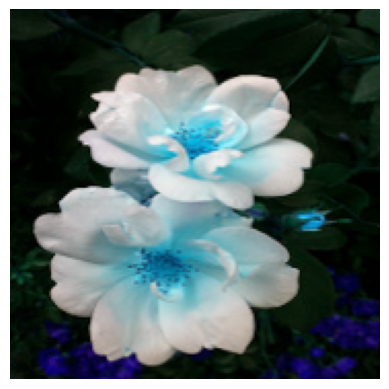

In [39]:
plt.axis('off')
plt.imshow(X[0])

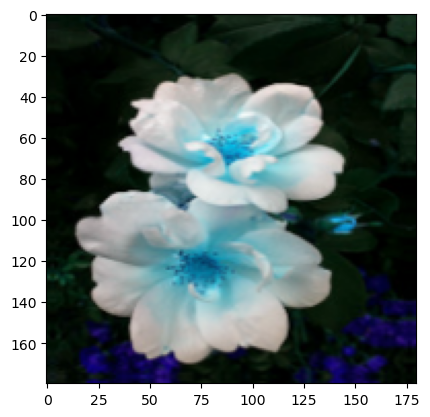

In [47]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [55]:
num_classes=5
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),  #16 filters each 3*3       
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
       layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 105s 1s/step - loss: 1.3162 - accuracy: 0.4368
Epoch 2/10
86/86 [==============================] - 97s 1s/step - loss: 1.0421 - accuracy: 0.5810
Epoch 3/10
86/86 [==============================] - 97s 1s/step - loss: 0.9965 - accuracy: 0.6174
Epoch 4/10
86/86 [==============================] - 105s 1s/step - loss: 0.9260 - accuracy: 0.6370
Epoch 5/10
86/86 [==============================] - 106s 1s/step - loss: 0.8683 - accuracy: 0.6679
Epoch 6/10
86/86 [==============================] - 101s 1s/step - loss: 0.8132 - accuracy: 0.6930
Epoch 7/10
86/86 [==============================] - 103s 1s/step - loss: 0.7836 - accuracy: 0.6813
Epoch 8/10
86/86 [==============================] - 103s 1s/step - loss: 0.7771 - accuracy: 0.7035
Epoch 9/10
86/86 [==============================] - 103s 1s/step - loss: 0.7428 - accuracy: 0.7173
Epoch 10/10
86/86 [==============================] - 105s 1s/step - loss: 0.7146 - accuracy: 0.7202


In [56]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 305ms/step - loss: 0.8368 - accuracy: 0.6917


[0.8368001580238342, 0.6917211413383484]

# Look at my accuracy is increased from 61 % to 69% on test data set due to data augmentation technique.

Thank you~~